In [7]:
#libraries for loading and manipulating data.
import numpy as np
import pandas as pd

#libraries for NLP and text preprocessing
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
import string 

#libraries for visualisation 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud

# set plot style
sns.set()

## Loading Data

In [17]:
#load data
df_train = pd.read_csv('train.csv')

train_set = df_train.copy()

pd.set_option('max_colwidth', None)
train_set.head()

,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954


## EDA
* Shape of the data
* Check if there are any null entries 
* Distinct sentiment types and frequency of each in dataset (bar graph representation)
* Duplicate entries (tweetid)
* Most common words before data cleaning (word cloud)

In [3]:
# General eda 
def eda (df):
    shape = train_set.shape
    null_entries = train_set.isnull().sum()
    dist_sent = list(train_set.sentiment.unique())
    duplicate = df.columns.duplicated().any()
    
    # summary
    a = print ('Shape of dataframe is ' + str(shape[0]) + ' rows and ' + str(shape[1]) + ' columns')
    b = print ('Unique sentiemnts are: ' +  str(dist_sent))
    c = print ('Duplicate entries: ', duplicate)
    d = print ('Checking for null entries in each column:\n' ,null_entries)
    
    return a,b,c,d

eda(train_set)

Shape of dataframe is 15819 rows and 3 columns
Unique sentiemnts are: [1, 2, 0, -1]
Duplicate entries:  False
Checking for null entries in each column:
 sentiment    0
message      0
tweetid      0
dtype: int64


(None, None, None, None)

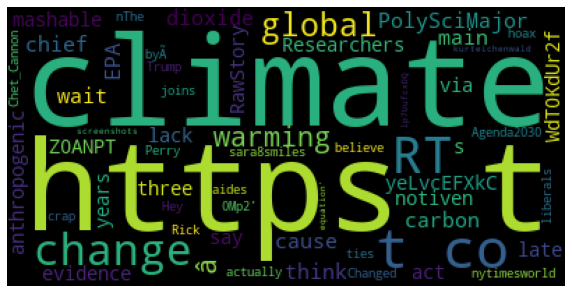

In [4]:
#Graphical EDA (wordcloud)
def word_cloud (df, column_name):
    wc = WordCloud()
    text = df[column_name].values
    msg_cloud = wc.generate(str(text))
    
    #plot wordcloud
    fig,ax = plt.subplots(figsize=(10,10))
    ax.plot
    plt.imshow(msg_cloud)
    plt.axis('off')
    plt.show
    
    return wc

word_cloud(train_set, 'message')

Word cloud summary:
* There are a lot or url links in the text (https)
* Frequently used specific words RELEVANT to climate change are: climate, global, warming, change, EPA( United States Environmental Protection Agency, dioxide, RT(a news network), CO (carbon monoxide), mashable(a news network), think, cause, change, evidence 

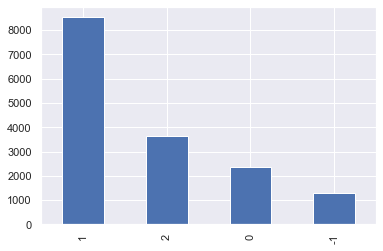

<AxesSubplot:>

In [6]:
#Graphical EDA (bar graphs), How many data samples are provided for each sentiment
def bar_graph(df, column_name):
    bar = df[column_name].value_counts().plot(kind = 'bar')
    plt.show()
    return bar

bar_graph(train_set, 'sentiment')

Bar graph summary:
* Samples of sentiment 1 are the most while samples of sentiment -1 are the least in the dataset
* 1 are pro climate change i.e the tweet supports the belief of man-made climate change
* -1 are anti climate change i.e the tweet does not believe in man-made climate change

# Feature Engineering
Noise removal involves removing any piece of information that is not relevant:
* Remove punctuation
* Remove urls 
* Remove stopwords
* Remove twitter handles (e.g @name)

Word normalization
* Tokenize the text (use TweetTokenizer)
* Perform stemming 
* Perform lammetization 
* Convert all text to lowercase
* Create features out of the text (use CountVectorize or TIF-ID)

In [ ]:
#remove noise
def remove_noise(df, column_name):
    #remove twitter handles 
    handles = re.findall(r"@(w+)", df[column_name])
    df[column_name] = df[column_name].replace(to_replace = handles, value = '', regex = True)
    
    #remove urls
    url_pattern = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
    df[column_name] = df[column_name].replace(to_replace = url_pattern, value = '', regex = True)
    
    #remove puntuation
    remove_punctuation = ''.join([l for l in post if l not in string.punctuation])
    df[column_name] = train_set['message'].apply(remove_punctuation)
    
    #remove stopwords 
    
    

In [ ]:
#word normalization
def normalize_words(df):
    #convert words to lowercase
    
    #tokenize 
    
    #